<a href="https://colab.research.google.com/github/annice6/Program-for-Data-Analytics-Project-1/blob/main/0_Project_1_Web_Scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1-4: Scrape Names & Heights of each team into dataframe, output as csv**

In [ ]:
#import libraries
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#create a dictionary of all 40 URLs
athletes_records ={
                    'Mens Swimming': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster','https://yorkathletics.com/sports/mens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster','https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster','https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster','https://mckbearcats.com/sports/mens-swimming-and-diving/roster','https://ramapoathletics.com/sports/mens-swimming-and-diving/roster','https://oneontaathletics.com/sports/mens-swimming-and-diving/roster','https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22','https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22'],
                    'Womens Swimming': ['https://csidolphins.com/sports/womens-swimming-and-diving/roster?view=2','https://queensknights.com/sports/womens-swimming-and-diving/roster','https://yorkathletics.com/sports/womens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim','https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster','https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster?view=2','https://mckbearcats.com/sports/womens-swimming-and-diving/roster','https://ramapoathletics.com/sports/womens-swimming-and-diving/roster','https://keanathletics.com/sports/womens-swimming-and-diving/roster','https://oneontaathletics.com/sports/womens-swimming-and-diving/roster'],
                    'Mens Volleyball': ['https://ccnyathletics.com/sports/mens-volleyball/roster','https://lehmanathletics.com/sports/mens-volleyball/roster','https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster','https://johnjayathletics.com/sports/mens-volleyball/roster','https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster','https://mecathletics.com/sports/mens-volleyball/roster','https://www.huntercollegeathletics.com/sports/mens-volleyball/roster','https://yorkathletics.com/sports/mens-volleyball/roster','https://ballstatesports.com/sports/mens-volleyball/roster'],
                    'Womens Volleyball': ['https://bmccathletics.com/sports/womens-volleyball/roster','https://yorkathletics.com/sports/womens-volleyball/roster?view=2','https://hostosathletics.com/sports/womens-volleyball/roster','https://bronxbroncos.com/sports/womens-volleyball/roster/2021','https://queensknights.com/sports/womens-volleyball/roster','https://augustajags.com/sports/wvball/roster','https://flaglerathletics.com/sports/womens-volleyball/roster','https://pacersports.com/sports/womens-volleyball/roster','https://www.golhu.com/sports/womens-volleyball/roster']
                    }


In [ ]:
#Function that scrape the URLs

def scraper(team_type, list_of_urls):  #iterate over the list of urls
  scraped_names = []  #create empty list to contain names
  scraped_heights =[]  #create empty list to contain heights

  for url in list_of_urls:
    page = requests.get(url)  #make a request to server that host url

    if page.status_code == 200:    #if request was successful

      soup = BeautifulSoup(page.content, 'html.parser')   #import the raw html into beautiful soup

      raw_heights = soup.find_all('td', class_ = 'height')  #extract all the td tags with team players' heights
      names = soup.find_all('td', class_ = 'sidearm-table-player-name')   #extract all the td tags with team players' names

      #use a single for loop to scrape the names & heights
      for x in range(len(raw_heights)):
        name = names[x].get_text().strip('\n')  #eliminate the formated space between names
        height = raw_heights[x].get_text()  #extract raw height

        scraped_names.append(name)  #append name to scraped_names list

       #if height is '-' as in no height number display, replace it with 'NaN' as a sign for missing data
        if height == '-':
          height = np.nan

        #if not extract feet & inches, convert it to float
        else:
          height = height.split('-')  #split feet & inches through "-" to convert into same metric; numbers on left side of split becomes 1st item, right side become 2nd item
          feet = float(height[0])
          inches = float(height[1])
          height = feet * 12 + inches   #convert feet to inches & total up the inches as height

        scraped_heights.append(height)   #append converted height to scraped_heights list

      #built dataframe
      athletes_heights = {'Names': scraped_names, 'Height': scraped_heights}  #create dictionary
      athletes_heights_df = pd.DataFrame(athletes_heights)  #set dataframe

      mean_values =  athletes_heights_df['Height'].mean()    #find the average of heights
      athletes_heights_df['Height'] = athletes_heights_df['Height'].fillna(mean_values)   # replace / fill in 'NaN' with the average of heights

  #set output as csv files
  filename = team_type + '.csv'   #set each files name
  athletes_heights_df.to_csv(filename, index=False)   #convert dataframe to csv
  from google.colab import files
  files.download(team_type +'.csv')
  return athletes_heights_df, mean_values   #return to loop


In [ ]:
#Men's Swimming Team
all_men_swimmers_df, men_swim_avg = scraper('Mens Swimming', athletes_records['Mens Swimming'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
all_men_swimmers_df   #Dataframe Table of all the players' name & heights, include fillin as average heights for missing data

,Names,Height
0,Anthony Attenborough,70.0
1,James Curran,69.0
2,Charles Cusumano,64.0
3,David Fayngersh,70.0
4,Michael Graham,70.0
...,...,...
171,Kieran Hassard,72.0
172,Anthony Laite,69.0
173,Drew MacDonald,72.0
174,Kyle Morken,73.0


In [ ]:
#Women's Swimming Team
all_women_swimmers_df, women_swim_avg = scraper('Womens Swimming', athletes_records['Womens Swimming'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
all_women_swimmers_df  #Dataframe Table of all the players' name & heights, include fillin as average heights for missing data

,Names,Height
0,Aurelia Barbagallo,63.000
1,Jacqueline DeFranco,65.000
2,Katherine Ebrahim,69.000
3,Jessica Johnson,68.000
4,Brooke Manning,66.000
...,...,...
148,Emma Stephenson,67.000
149,Callie Stinson,64.000
150,Alyssa Thompson,65.888
151,Samantha Vezza,65.888


In [ ]:
#Men's Volleyball Team
all_men_volleyball_players_df, men_volleyball_avg = scraper('Mens Volleyball', athletes_records['Mens Volleyball'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
all_men_volleyball_players_df   #Dataframe Table of all the players' name & heights, include fillin as average heights for missing data

,Names,Height
0,Angel Gabriel Chabla,63.000000
1,Jeffrey Celis,69.000000
2,Edwin Fierros Gaytan,68.000000
3,Prabodh KC,72.000000
4,Ethan Sherpa,71.000000
...,...,...
119,Braydon Savitski-Lynde,72.213115
120,Patrick Rogers,79.000000
121,Lukas Pytlak,74.000000
122,Will Patterson,82.000000


In [ ]:
#Women's Volleyball Team
all_women_volleyball_players_df, women_volleyball_avg = scraper('Womens Volleyball', athletes_records['Womens Volleyball'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
all_women_volleyball_players_df   #Dataframe Table of all the players' name & heights, include fillin as average heights for missing data

,Names,Height
0,Crystal Saw,64.000
1,Yisneily Morales,61.000
2,Sarah Sellami,68.000
3,Marie Claire Hurtado,67.664
4,Garyana Altidor,61.000
...,...,...
121,Sabrina Valentin,68.000
122,Sherian Horner,71.000
123,Alyssa Daley,75.000
124,Myka Costanzo,64.000


**Q5: Average of Each Team / Dataframe**

In [ ]:
men_swim_avg  #average heights of Men's Swimming Team , not include the fillin height for missing data

71.35714285714286

In [ ]:
women_swim_avg  #average heights of Women's Swimming Team , not include the fillin height for missing data

65.888

In [ ]:
men_volleyball_avg  #average heights of Men's Volleyball Team , not include the fillin height for missing data

72.21311475409836

In [ ]:
women_volleyball_avg  #average heights of Women's Volleyball Team , not include the fillin height for missing data

67.664

**Q6: 5 tallest & shortest players in each team**

In [ ]:
all_men_swimmers_df.nlargest(5, 'Height')   #Mens Swimming Team 5 Tallest

,Names,Height
81,Colton Grimes,79.0
104,Tyson Upton,79.0
153,Eric Kroon,77.0
50,Mattia Giurgevich,76.0
64,Adam Szcerba,76.0


In [ ]:
all_men_swimmers_df.nsmallest(5, 'Height')  #Mens Swimming Team 5 Shortest

,Names,Height
78,Miles Fleischer,63.0
2,Charles Cusumano,64.0
41,Joseph Scarpetta,65.0
86,Wyatt Kurtz,65.0
111,Samuel De Leon,65.0


In [ ]:
all_women_swimmers_df.nlargest(5, 'Height')   #Womens Swimming Team 5 Tallest

,Names,Height
80,McKenzie Fazio,75.0
68,Maja Piotrowicz,73.0
51,Kornelia Buszka,71.0
85,Presley Heitzmann,71.0
117,Grace Geyer,71.0


In [ ]:
all_women_swimmers_df.nsmallest(5, 'Height')  #Womens Swimming Team 5 Shortest

,Names,Height
22,Melanie Rodriguez,59.0
26,Micaela Reyes,59.0
12,Asha Besaw,61.0
18,Kristen Flores,61.0
31,Amanda Lee,61.0


In [ ]:
all_men_volleyball_players_df.nlargest(5, 'Height')   #Mens Volleyball Team 5 Tallest

,Names,Height
122,Will Patterson,82.0
48,Kyle Barriffe-Johnson,79.0
67,Akil Vaughn,79.0
106,Griffin Satterfield,79.0
120,Patrick Rogers,79.0


In [ ]:
all_men_volleyball_players_df.nsmallest(5, 'Height')  #Mens Volleyball Team 5 Shortest

,Names,Height
0,Angel Gabriel Chabla,63.0
16,Chris Mata,63.0
34,Bryce Glasper,64.0
22,Wai Lin,65.0
32,Dion Csikortos,65.0


In [ ]:
all_women_volleyball_players_df.nlargest(5, 'Height')   #Womens Volleyball Team 5 Tallest

,Names,Height
70,Kayli Cleaver,76.0
65,Savannah Davis,75.0
67,Sophia Kruczko,75.0
86,Molly Boyd,75.0
123,Alyssa Daley,75.0


In [ ]:
all_women_volleyball_players_df.nsmallest(5, 'Height')  #Womens Volleyball Team 5 Shortest

,Names,Height
26,Samara Correa,60.0
1,Yisneily Morales,61.0
4,Garyana Altidor,61.0
17,Jasmine Vega,61.0
34,Rashel Torres,61.0


**Q7-8: Bar Graph of the averages, comparison**

In [ ]:
#compare averages between volleyball team and swimming teeam
if women_volleyball_avg and men_volleyball_avg > women_swim_avg and men_swim_avg:
  print('volleyball players are taller than swimmers on average')
else:
  print('swimmers are taller than volleyball players on average')

volleyball players are taller than swimmers on average


In [ ]:
#create a dicitonary of Team Type and Average Heights
avg_heights = {'Team Type': ['Mens Swim','Womens Swim','Mens Volleyball','Womens Volleyball'],
              'Avg Height' :[men_swim_avg, women_swim_avg, men_volleyball_avg, women_volleyball_avg]
               }

In [ ]:
avg_heights_df = pd.DataFrame(avg_heights)  #set dataframe

In [ ]:
avg_heights_df  #Dataframe Table for the averages of each teams

,Team Type,Avg Height
0,Mens Swim,71.357143
1,Womens Swim,65.888000
2,Mens Volleyball,72.213115
3,Womens Volleyball,67.664000


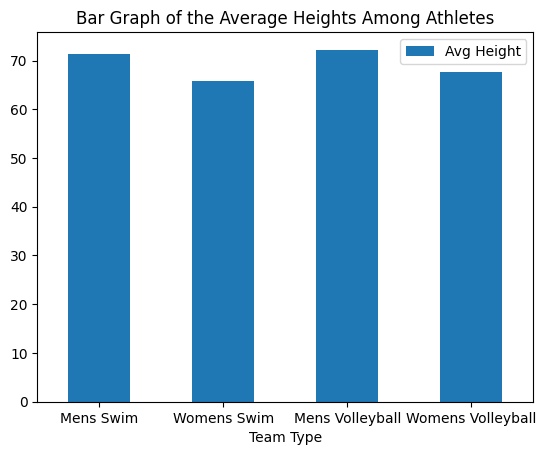

In [ ]:
#Build Bar Graph
avg_heights_df.plot.bar(x='Team Type', y='Avg Height', rot=0, title='Bar Graph of the Average Heights Among Athletes')
plt.show()  #show graph